In [31]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

In [32]:
import pandas 
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
%matplotlib inline

In [33]:
def grab_image(img_path):
    img = image.load_img(img_path, target_size=(299, 299)) 
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [34]:
# Load data labels here
dataframe = pandas.read_table('Project_labels/train.txt', 
                      delim_whitespace=True, 
                      index_col=0, 
                      header=None)
Y = np.array(dataframe)
    
Y = keras.utils.to_categorical(Y)
Y.shape
Y[0:10, ]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [35]:
#df = pandas.DataFrame(dataframe)

index = dataframe.index.values

list_of_filenames = list(index)

print(list_of_filenames[0:20])

['imagesq/q/o/c/qoc54c00/80035521.tif', 'imagese/e/w/c/ewc23d00/513280028.tif', 'imagesw/w/b/t/wbt26e00/2053453161.tif', 'imagesm/m/k/m/mkm05e00/2040792992_2040792994.tif', 'imageso/o/e/x/oex80d00/522787731+-7732.tif', 'imagesq/q/v/t/qvt06d00/50525666-5667.tif', 'imagesr/r/l/z/rlz20d00/521107137+-7140.tif', 'imagesk/k/n/i/kni98c00/87538356_8359.tif', 'imagesm/m/q/v/mqv03f00/0011846871.tif', 'imagesf/f/o/x/fox75a00/2505168109_8112.tif', 'imagesl/l/m/r/lmr62f00/tob11616.13.tif', 'imagesj/j/c/b/jcb02d00/71388738.tif', 'imagesm/m/r/d/mrd16e00/2044400348.tif', 'imagesi/i/x/l/ixl83d00/509002680.tif', 'imagesp/p/i/u/piu62d00/80303362_3392.tif', 'imagesd/d/b/t/dbt17d00/2074444405.tif', 'imagesy/y/s/o/yso47c00/2063068018.tif', 'imagesn/n/t/y/nty14d00/507705676.tif', 'imagesx/x/y/o/xyo21e00/87777221_87777238.tif', 'imagesr/r/m/e/rme14a00/71453906.tif']


In [37]:
X = np.concatenate( 
    [grab_image(list_of_filenames[i])
    for i in range(1,100)]) 
X.shape

FileNotFoundError: [Errno 2] No such file or directory: 'imagese/e/w/c/ewc23d00/513280028.tif'

In [196]:
#Build model
model=keras.Sequential()
# Note the input size (there is only one channel - intensity)
# these images... if you are using color images, your would
# need to set the last dimension of the input_shape to -3-
# above and this would carry over into this cell...
model.add(keras.layers.Conv2D(36,kernel_size=(6,6),
                              activation='relu',input_shape=[X.shape[1],
                                                             X.shape[2],
                                                             X.shape[3]]))
model.add(keras.layers.Conv2D(65,(6,6),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(65,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(Y.shape[1],activation='softmax'))

model.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 95, 95, 36)        3924      
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 90, 90, 65)        84305     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 45, 45, 65)        0         
_________________________________________________________________
dropout_106 (Dropout)        (None, 45, 45, 65)        0         
_________________________________________________________________
flatten_53 (Flatten)         (None, 131625)            0         
_________________________________________________________________
dense_106 (Dense)            (None, 65)                8555690   
_________________________________________________________________
dropout_107 (Dropout)        (None, 65)              

In [197]:
#Train model
batch_size = 20
epochs = 10
history = model.fit(X, Y,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1)

Epoch 1/10
5/5 [==============================] - 6s 1s/step - loss: 1.5818 - categorical_accuracy: 0.5092
Epoch 2/10
5/5 [==============================] - 5s 1s/step - loss: 0.6875 - categorical_accuracy: 0.6147
Epoch 3/10
5/5 [==============================] - 5s 979ms/step - loss: 0.6331 - categorical_accuracy: 0.6582
Epoch 4/10
5/5 [==============================] - 5s 968ms/step - loss: 0.5592 - categorical_accuracy: 0.6946
Epoch 5/10
5/5 [==============================] - 5s 949ms/step - loss: 0.4319 - categorical_accuracy: 0.7868
Epoch 6/10
5/5 [==============================] - 5s 1s/step - loss: 0.3136 - categorical_accuracy: 0.9013
Epoch 7/10
5/5 [==============================] - 5s 932ms/step - loss: 0.1868 - categorical_accuracy: 0.9549
Epoch 8/10
5/5 [==============================] - 5s 1s/step - loss: 0.1354 - categorical_accuracy: 0.9582
Epoch 9/10
5/5 [==============================] - 5s 977ms/step - loss: 0.0733 - categorical_accuracy: 0.9885
Epoch 10/10
5/5 [=====

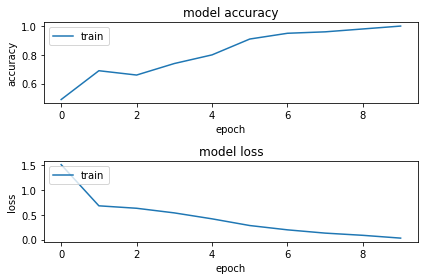

In [200]:
plt.figure()

# summarize history for accuracy  
plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='upper left')

# summarize history for loss  
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='upper left')
plt.tight_layout()
plt.show()